In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Bondora_raw.csv')

<ipython-input-3-f9812be72a8c>:1: DtypeWarning: Columns (34,37,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Copy of Bondora_raw.csv')


In [ ]:
bondora=df.copy()
bondora.dtypes


ReportAsOfEOD                           object
LoanId                                  object
LoanNumber                               int64
ListedOnUTC                             object
BiddingStartedOn                        object
                                        ...   
NrOfScheduledPayments                  float64
ReScheduledOn                           object
PrincipalDebtServicingCost             float64
InterestAndPenaltyDebtServicingCost    float64
ActiveLateLastPaymentCategory           object
Length: 112, dtype: object

In [ ]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: None]


In [ ]:
bondora.shape

(134529, 112)

In [ ]:

bondora.drop(bondora[bondora['Status']=='Current'].index,axis=0,inplace=True)

In [ ]:
bondora['default']=np.where(bondora['DefaultDate'].isna(),0,1)

In [ ]:
col=bondora.columns[bondora.isna().sum()*100/len(bondora)>40]
bondora_cleaned=bondora.drop(col,axis=1)

In [ ]:
bondora_cleaned.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 88 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ReportAsOfEOD                           77394 non-null  object 
 1   LoanId                                  77394 non-null  object 
 2   LoanNumber                              77394 non-null  int64  
 3   ListedOnUTC                             77394 non-null  object 
 4   BiddingStartedOn                        77394 non-null  object 
 5   BidsPortfolioManager                    77394 non-null  int64  
 6   BidsApi                                 77394 non-null  int64  
 7   BidsManual                              77394 non-null  float64
 8   UserName                                77394 non-null  object 
 9   NewCreditCustomer                       77394 non-null  bool   
 10  LoanApplicationStartedDate              77394 non-null  o

In [ ]:
cols_to_drop=['ReportAsOfEOD','ListedOnUTC','BiddingStartedOn','LoanApplicationStartedDate','CurrentDebtDaysSecondary','DebtOccuredOn','DebtOccuredOnForSecondary','LoanDate','FirstPaymentDate','MaturityDate_Last','DateOfBirth','LastPaymentOn','StageActiveSince','MaturityDate_Original','IncomeFromPension','IncomeFromFamilyAllowance','IncomeFromSocialWelfare','IncomeFromLeavePay','IncomeFromChildSupport','LoanId','LoanNumber','UserName','ActiveScheduleFirstPaymentReached','ExpectedReturn','ApplicationSignedWeekday','ApplicationSignedHour','ModelVersion','WorseLateCategory','PrincipalOverdueBySchedule','PlannedInterestTillDate']

In [ ]:
bondora_cleaned.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
bondora_cleaned.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77349 non-null  float64
 5   LanguageCode                            77394 non-null  int64  
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77349 non-null  float64
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  f

In [ ]:
bondora_cleaned.isna().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                             45
LanguageCode                                  0
Age                                           0
Gender                                       45
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6627
County                                    20515
City                                       5044
UseOfLoan                                     0
Education                                    45
MaritalStatus                                45
EmploymentStatus                            197
EmploymentDurationCurrentEmployer       

In [ ]:
bondora_cleaned['LanguageCode']=np.where(bondora_cleaned['LanguageCode'].isin([22,15,10,13,7,21]),0,bondora_cleaned['LanguageCode'])

In [ ]:
bondora_cleaned['VerificationType'].unique()

array([ 2.,  4.,  1.,  3.,  0., nan])

In [ ]:
bondora_cleaned['VerificationType'].fillna(0,inplace=True)
bondora_cleaned['VerificationType']=bondora_cleaned['VerificationType'].map({0:'Not set', 1:'Income unverified', 2:'Income unverified, cross-referenced by phone' ,3:'Income verified' ,4:'Income and expenses verified'})

In [ ]:
bondora_cleaned['UseOfLoan'].unique()

array([  7,   2,   0,   6,   8,   3,   5,   4,   1, 110, 101, 102, 104,
       108, 106, 107,  -1])

In [ ]:
bondora_cleaned['UseOfLoan']=np.where(bondora_cleaned['UseOfLoan']==-1,7,bondora_cleaned['UseOfLoan'])

In [ ]:
bondora_cleaned['UseOfLoan']=bondora_cleaned['UseOfLoan'].map({0:'Loan consolidation',1:'Real estate',2:'Home improvement',3:'Business',4:'Education' ,5:'Travel',6:'Vehicle',7:'Other',8:'Health',101:'Working capital financing',102:'Purchase of machinery equipment',103:'Renovation of real estate ',104:'Accounts receivable financing',105:'Acquisition of means of transport',106:'Construction finance',107:'Acquisition of stocks',108:'Acquisition of real estate',109:'Guaranteeing obligation',110:'Other business' })

In [ ]:
bondora_cleaned['Gender'].fillna(2,inplace=True)

In [ ]:
bondora_cleaned['Gender'].unique()

array([1., 0., 2.])

In [ ]:
bondora_cleaned['Gender']=bondora_cleaned['Gender'].map({0:'Male',1:'Female',2:'Undefined'})

In [ ]:
bondora_cleaned['HomeOwnershipType'].unique()

array([nan,  0.,  4.,  2.,  3.,  5.,  1.,  8.,  7.,  6.,  9., 10., -1.])

In [ ]:
bondora_cleaned['HomeOwnershipType'].fillna(10,inplace=True)
bondora_cleaned['HomeOwnershipType']=np.where(bondora_cleaned['HomeOwnershipType']==-1,10,bondora_cleaned['HomeOwnershipType'])

In [ ]:
bondora_cleaned['HomeOwnershipType'].unique()

array([10.,  0.,  4.,  2.,  3.,  5.,  1.,  8.,  7.,  6.,  9.])

In [ ]:
bondora_cleaned['HomeOwnershipType']=bondora_cleaned['HomeOwnershipType'].map({ 0:'Homeless', 1: 'Owner',2:'Living with parents' ,3:'Tenant, pre-furnished property',4:'Tenant, unfurnished property',5:'Council house' ,6:'Joint tenant',7:'Joint ownership',8:'Mortgage',9:'Owner with encumbrance' ,10:'Other'})

In [ ]:
bondora_cleaned['MaritalStatus'].unique()

array([ 1.,  4.,  3.,  2.,  5.,  0., nan, -1.])

In [ ]:
bondora_cleaned['MaritalStatus']=bondora_cleaned['MaritalStatus'].map({0:'not set',1:'Married',2:'Cohabitant', 3:'Single' ,4:'Divorced' ,5:'Widow'})

In [ ]:
bondora_cleaned['MaritalStatus'].fillna('not set',inplace=True)

In [ ]:
bondora_cleaned['MaritalStatus'].unique()

array(['Married', 'Divorced', 'Single', 'Cohabitant', 'Widow', 'not set'],
      dtype=object)

In [ ]:
bondora_cleaned['EmploymentStatus'].unique()

array([ 3., nan,  2.,  4.,  5.,  6.,  0., -1.])

In [ ]:
bondora_cleaned['EmploymentStatus']=bondora_cleaned['EmploymentStatus'].map({0:'Unemployed',-1:'Unemployed',-2:'not set',2:'Partially employed',3:'Fully employed', 4:'Self-employed' ,5:'Entrepreneur' ,6:'Retiree'})
bondora_cleaned['EmploymentStatus'].fillna(-2,inplace=True)


In [ ]:
bondora_clean=bondora_cleaned.copy()

In [ ]:
bondora_clean['OccupationArea'].unique()

array([ 7., 16.,  9.,  1., 10., 12.,  8.,  6., 11., 17.,  5.,  4.,  3.,
       19., nan,  0., 18., 15., 13., 14.,  2., -1.])

In [ ]:
bondora_clean['OccupationArea']=bondora_clean['OccupationArea'].map({1:'Other',2:'Mining',3:'Processing',4:'Energy',5:'Utilities',6:'Construction',7:'Retail and wholesale',8:'Transport and warehousing',9:'Hospitality and catering',10:'Info and telecom',11:'Finance and insurance',12:'Real-estate',13:'Research',14:'Administrative',15:'Civil service & military',16:'Education',17:'Healthcare and social help' ,18:'Art and entertainment',19:'Agriculture, forestry and fishing'})

In [ ]:
bondora_clean['OccupationArea']=np.where((bondora_clean['OccupationArea']==-1)|(bondora_clean['OccupationArea'].isna())|(bondora_clean['OccupationArea']==0),1,bondora_clean['OccupationArea'])

In [ ]:
bondora_clean['Education'].unique()

array([ 3.,  5.,  4.,  2.,  1.,  0., nan, -1.])

In [ ]:
bondora_clean['Education'].fillna(-1,inplace=True)
bondora_clean['Education']=bondora_clean['Education'].map({0:'not set',-1:'not set',1:'Primary education' ,2:'Basic education',3:'Vocational education' ,4:'Secondary education',5:'Higher education'})

In [ ]:
bondora_clean['LanguageCode'].unique()

array([1, 3, 2, 4, 6, 0, 9, 5])

In [ ]:
bondora_clean['LanguageCode']=bondora_clean['LanguageCode'].map({0:'not set',1:'Estonian',2:'English',3:'Russian',4:'Finnish',5:'German',6:'Spanish',9:'Slovakian'})

In [ ]:
bondora_clean['EmploymentDurationCurrentEmployer'].fillna('other',inplace=True)

In [ ]:
bondora_clean.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77394 non-null  object 
 5   LanguageCode                            77394 non-null  object 
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77394 non-null  object 
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  f

In [ ]:
bondora_clean['CreditScoreEsMicroL'].fillna(bondora_clean['CreditScoreEsMicroL'].value_counts().idxmax(),inplace=True)

In [ ]:
bondora_clean.drop(['County','City'],inplace=True,axis=1)

In [ ]:
clean=bondora_clean.copy()

In [ ]:
clean.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77394 non-null  object 
 5   LanguageCode                            77394 non-null  object 
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77394 non-null  object 
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  f

In [ ]:
cols_to_clean=clean[clean.columns[(clean.dtypes==int)|(clean.dtypes==float)]].isna().sum()
cols_to_clean=list(cols_to_clean[cols_to_clean>0].index)
cols_to_clean

['MonthlyPayment',
 'DebtToIncome',
 'FreeCash',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'ExpectedLoss',
 'LossGivenDefault',
 'ProbabilityOfDefault',
 'RecoveryStage',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsBefoleLoan',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost']

In [ ]:
for col in cols_to_clean:
  clean[col].fillna(np.mean(clean[col]),inplace=True)

In [ ]:
clean.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77394 non-null  object 
 5   LanguageCode                            77394 non-null  object 
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77394 non-null  object 
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  f

In [ ]:
clean['InterestAndPenaltyBalance'].fillna(clean['InterestAndPenaltyBalance'].mode()[0], inplace=True)


In [ ]:
clean['NoOfPreviousLoansBeforeLoan'].unique()

array([ 1,  2,  0,  3,  4,  5,  9,  8,  7,  6, 11, 10, 13, 20, 12, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24])

In [ ]:
def fill_column_with_mean(df, column):
    df[column].fillna(df[column].mean(), inplace=True)
    return df


In [ ]:
clean=fill_column_with_mean(clean,'FreeCash')

In [ ]:
clean['EmploymentDurationCurrentEmployer'].fillna(clean['EmploymentDurationCurrentEmployer'].mode()[0],inplace=True)

In [ ]:
clean['Rating'].fillna(clean['Rating'].value_counts().idxmax(),inplace=True)

In [ ]:
clean=clean.drop(['ActiveLateLastPaymentCategory'],axis=1)

In [ ]:
clean.to_csv('/content/drive/MyDrive/Dataset/clean.csv',index=False)

In [ ]:
clean.isna().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeFromPrincipalEmployer               0
IncomeOther                     

In [ ]:
clean.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
VerificationType                           object
LanguageCode                               object
Age                                         int64
Gender                                     object
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                  object
Education                                  object
MaritalStatus                              object
EmploymentStatus                           object
EmploymentDurationCurrentEmployer          object
OccupationArea                             object


In [ ]:
numerical=clean[clean.columns[(clean.dtypes=='int64')|(clean.dtypes=='float64')]]

In [ ]:
categorical=clean[clean.columns[(clean.dtypes!='int64')&(clean.dtypes!='float64')]]

In [ ]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   Age                                     77394 non-null  int64  
 4   AppliedAmount                           77394 non-null  float64
 5   Amount                                  77394 non-null  float64
 6   Interest                                77394 non-null  float64
 7   LoanDuration                            77394 non-null  int64  
 8   MonthlyPayment                          77394 non-null  float64
 9   IncomeFromPrincipalEmployer             77394 non-null  float64
 10  IncomeOther                             77394 non-null  f

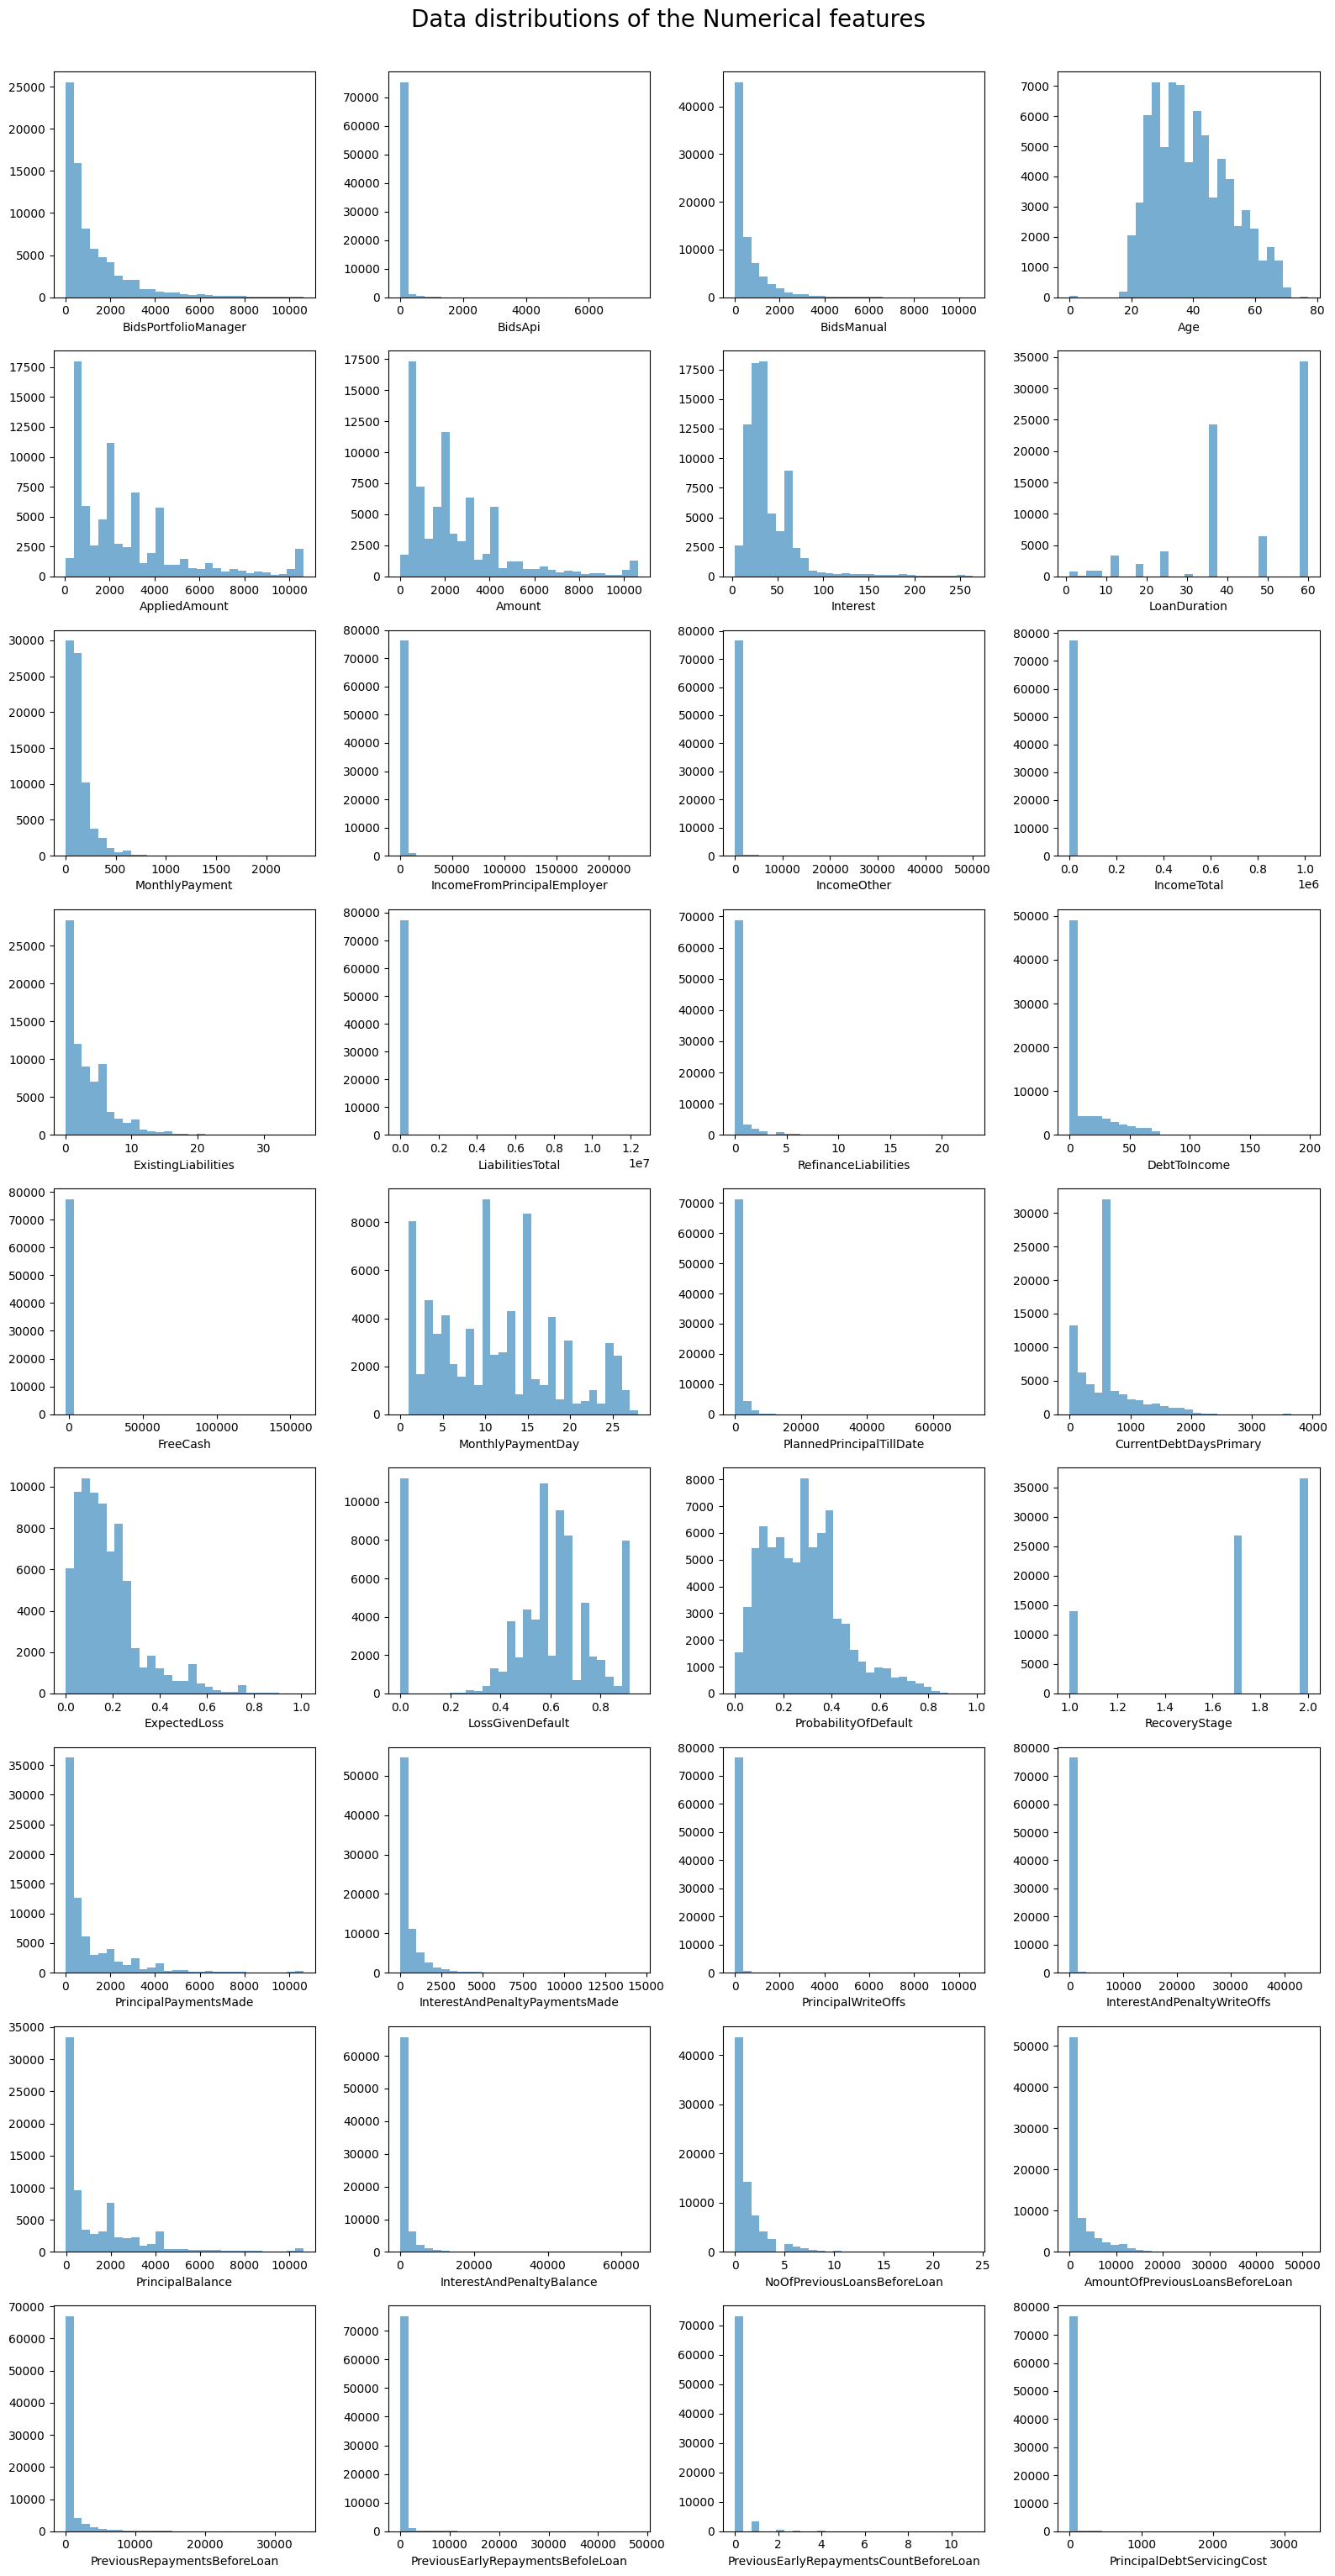

In [ ]:
def visualizedist(dff):
  int_cols = [f for f in dff.columns]
  _, axs = plt.subplots(9, 4, figsize=(16,30))
  i=0
  for f, ax in zip(int_cols, axs.ravel()):
      mi = dff[f].min()
      ma = dff[f].max()
      bins = np.linspace(mi, ma, 30)
      ax.hist(dff[f], bins=bins, alpha=0.6)
      ax.set_xlabel(f)
  plt.tight_layout(w_pad=1)
  plt.suptitle('Data distributions of the Numerical features', fontsize=20, y=1.02)
  plt.show()
visualizedist(numerical)
#visualizedist(non_transformed)


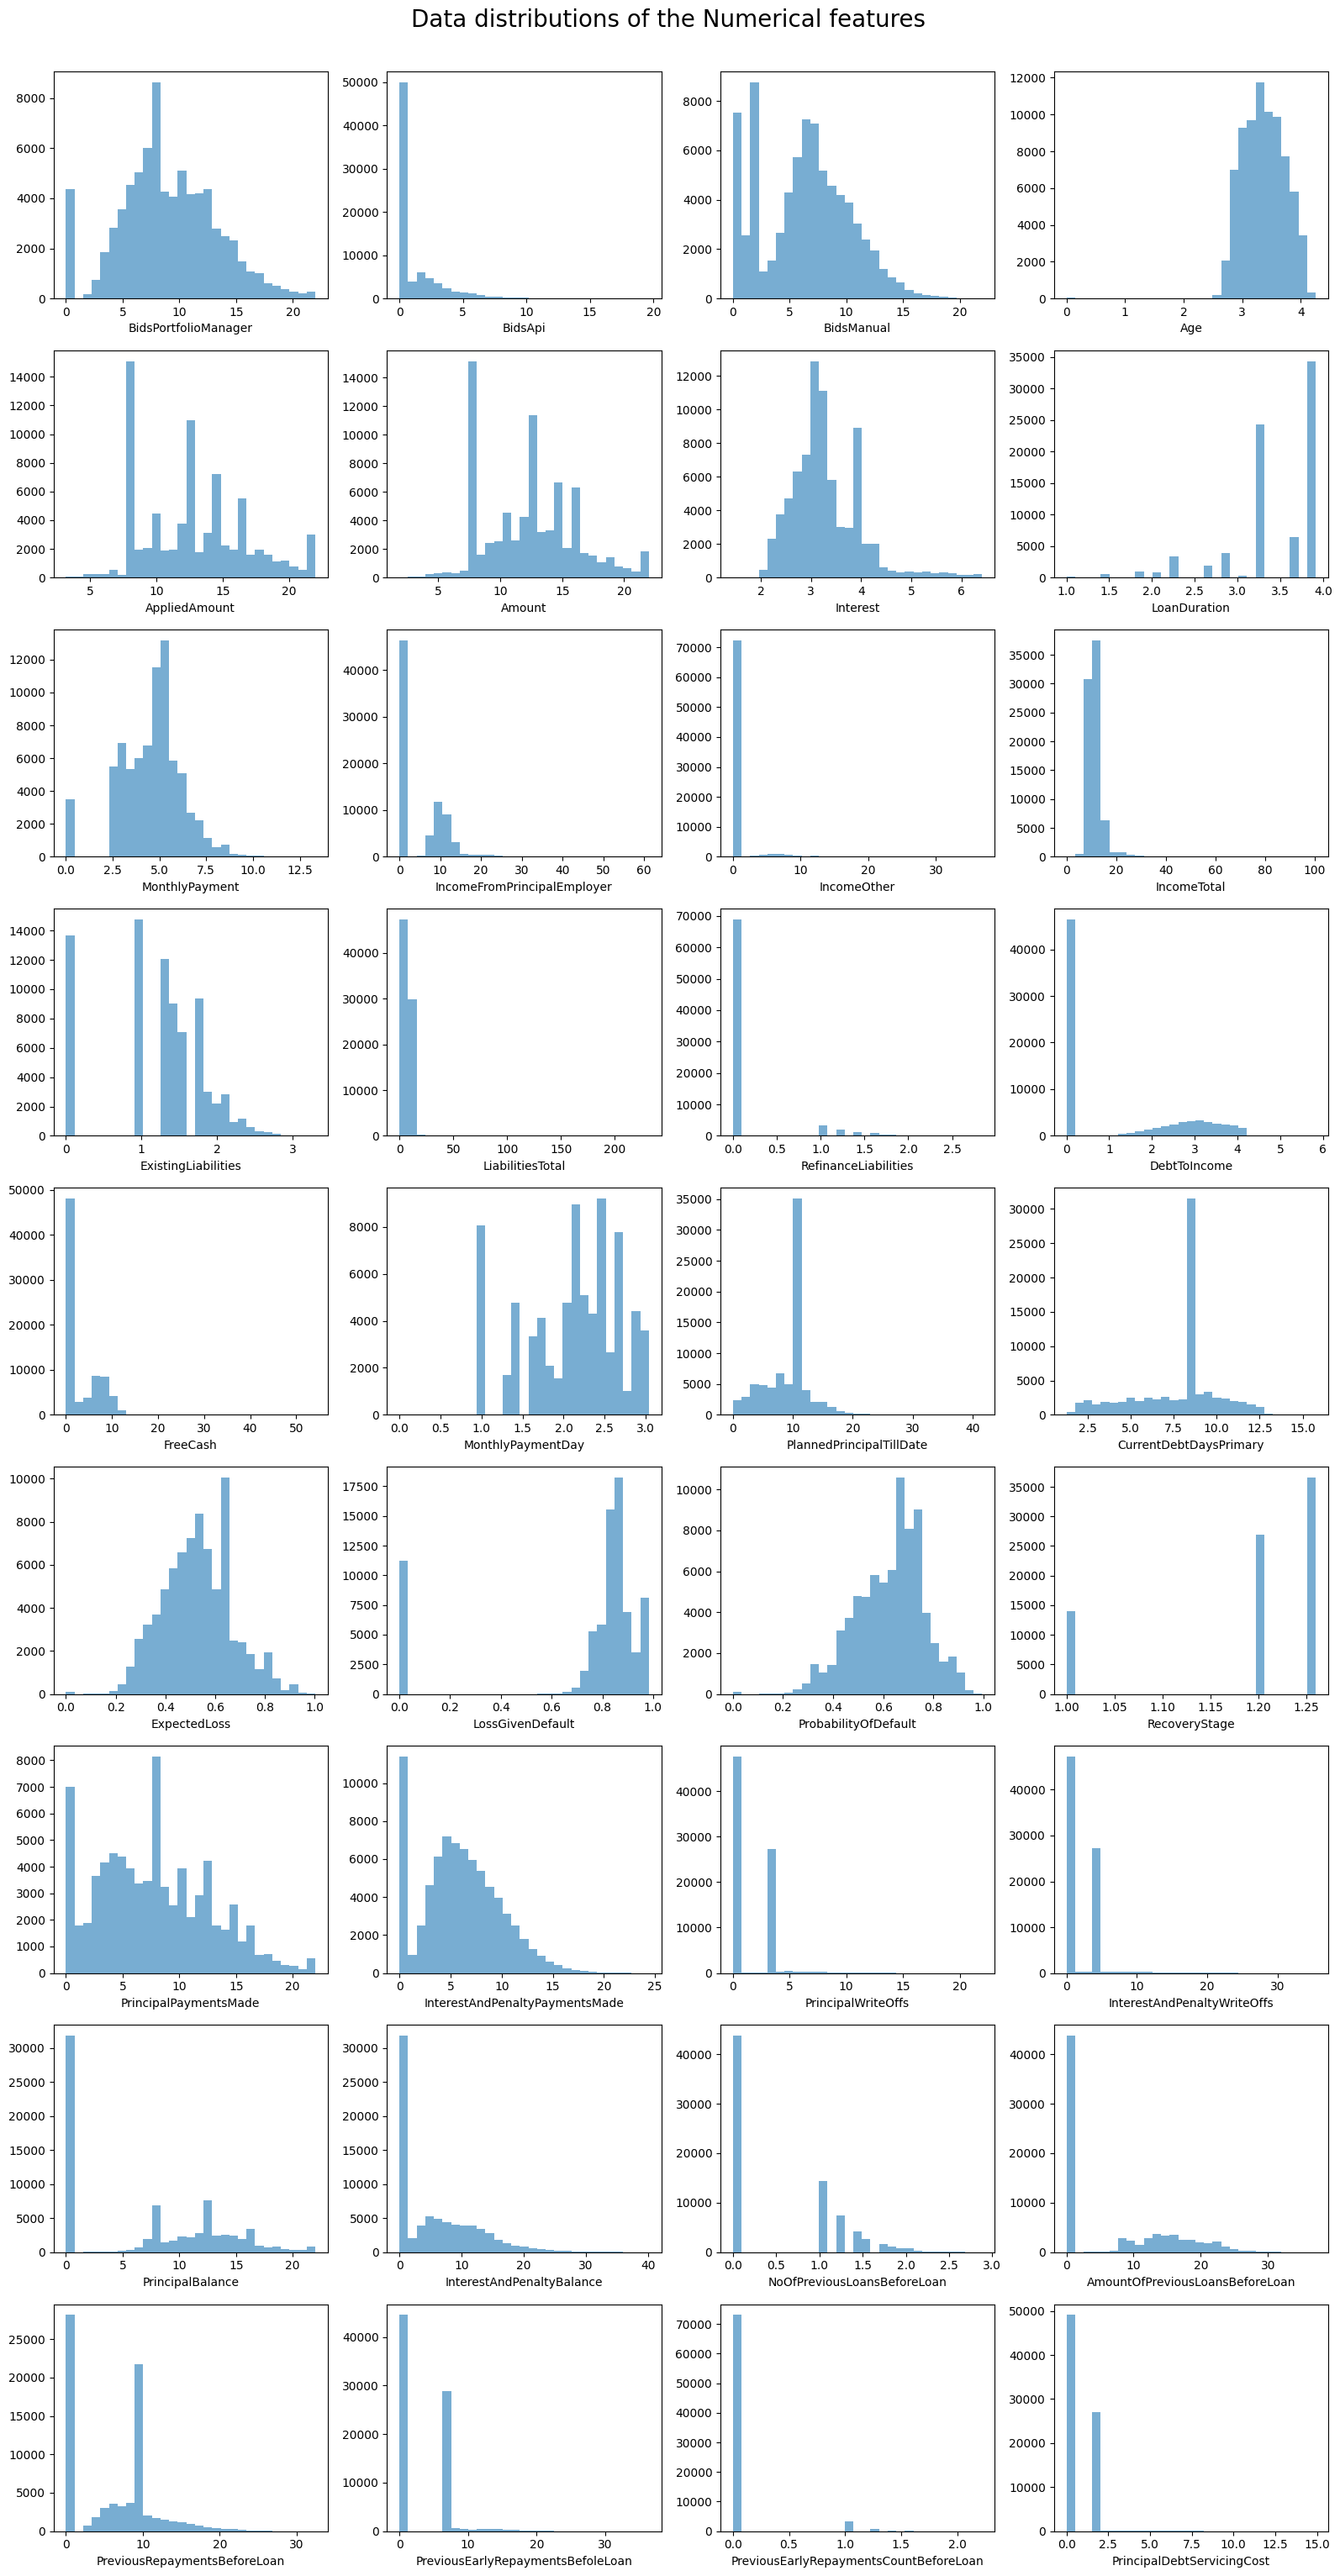

In [ ]:
transformed=numerical.copy()
for i in transformed.columns:
  transformed[i]=np.power(transformed[i],1/3)
visualizedist(transformed)
cube_root=['BidsPortfoliManager','BidsManual','ExpectedLoss']

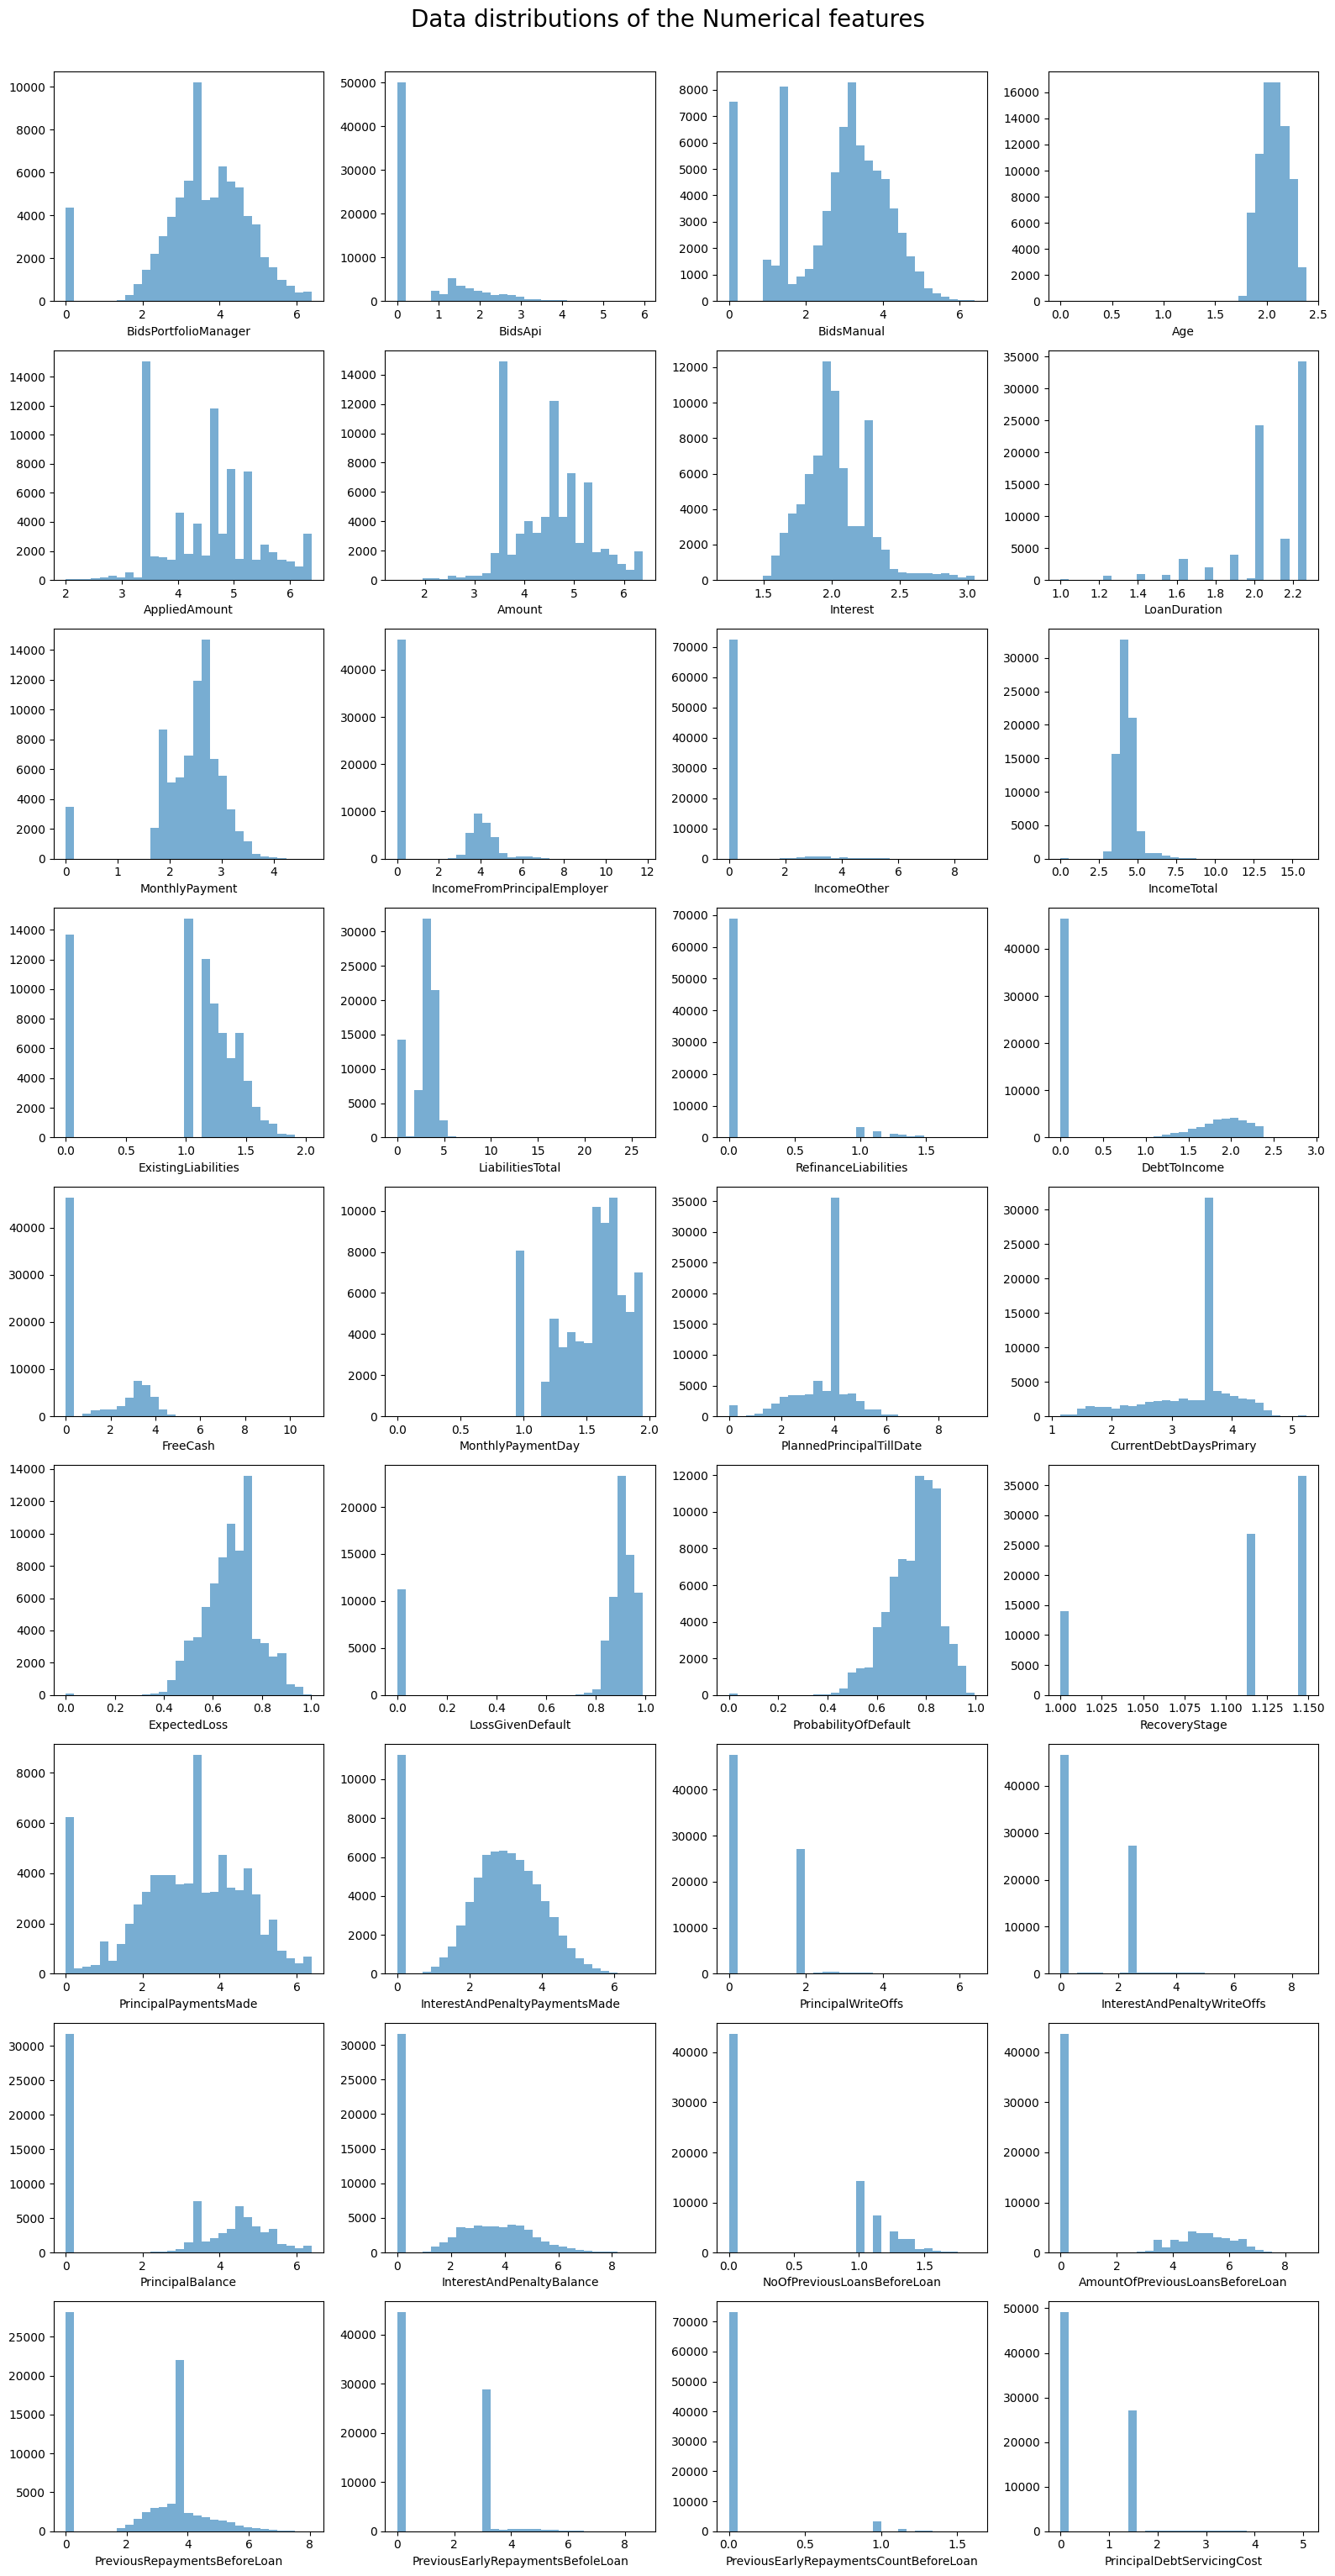

In [ ]:
transformed=numerical.copy()
for i in transformed.columns:
  transformed[i]=np.power(transformed[i],1/5)
visualizedist(transformed)
power_5=['Interest','MonthlyPayment','PrincipalPaymentsMade','InterestAndPenaltyMade']

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


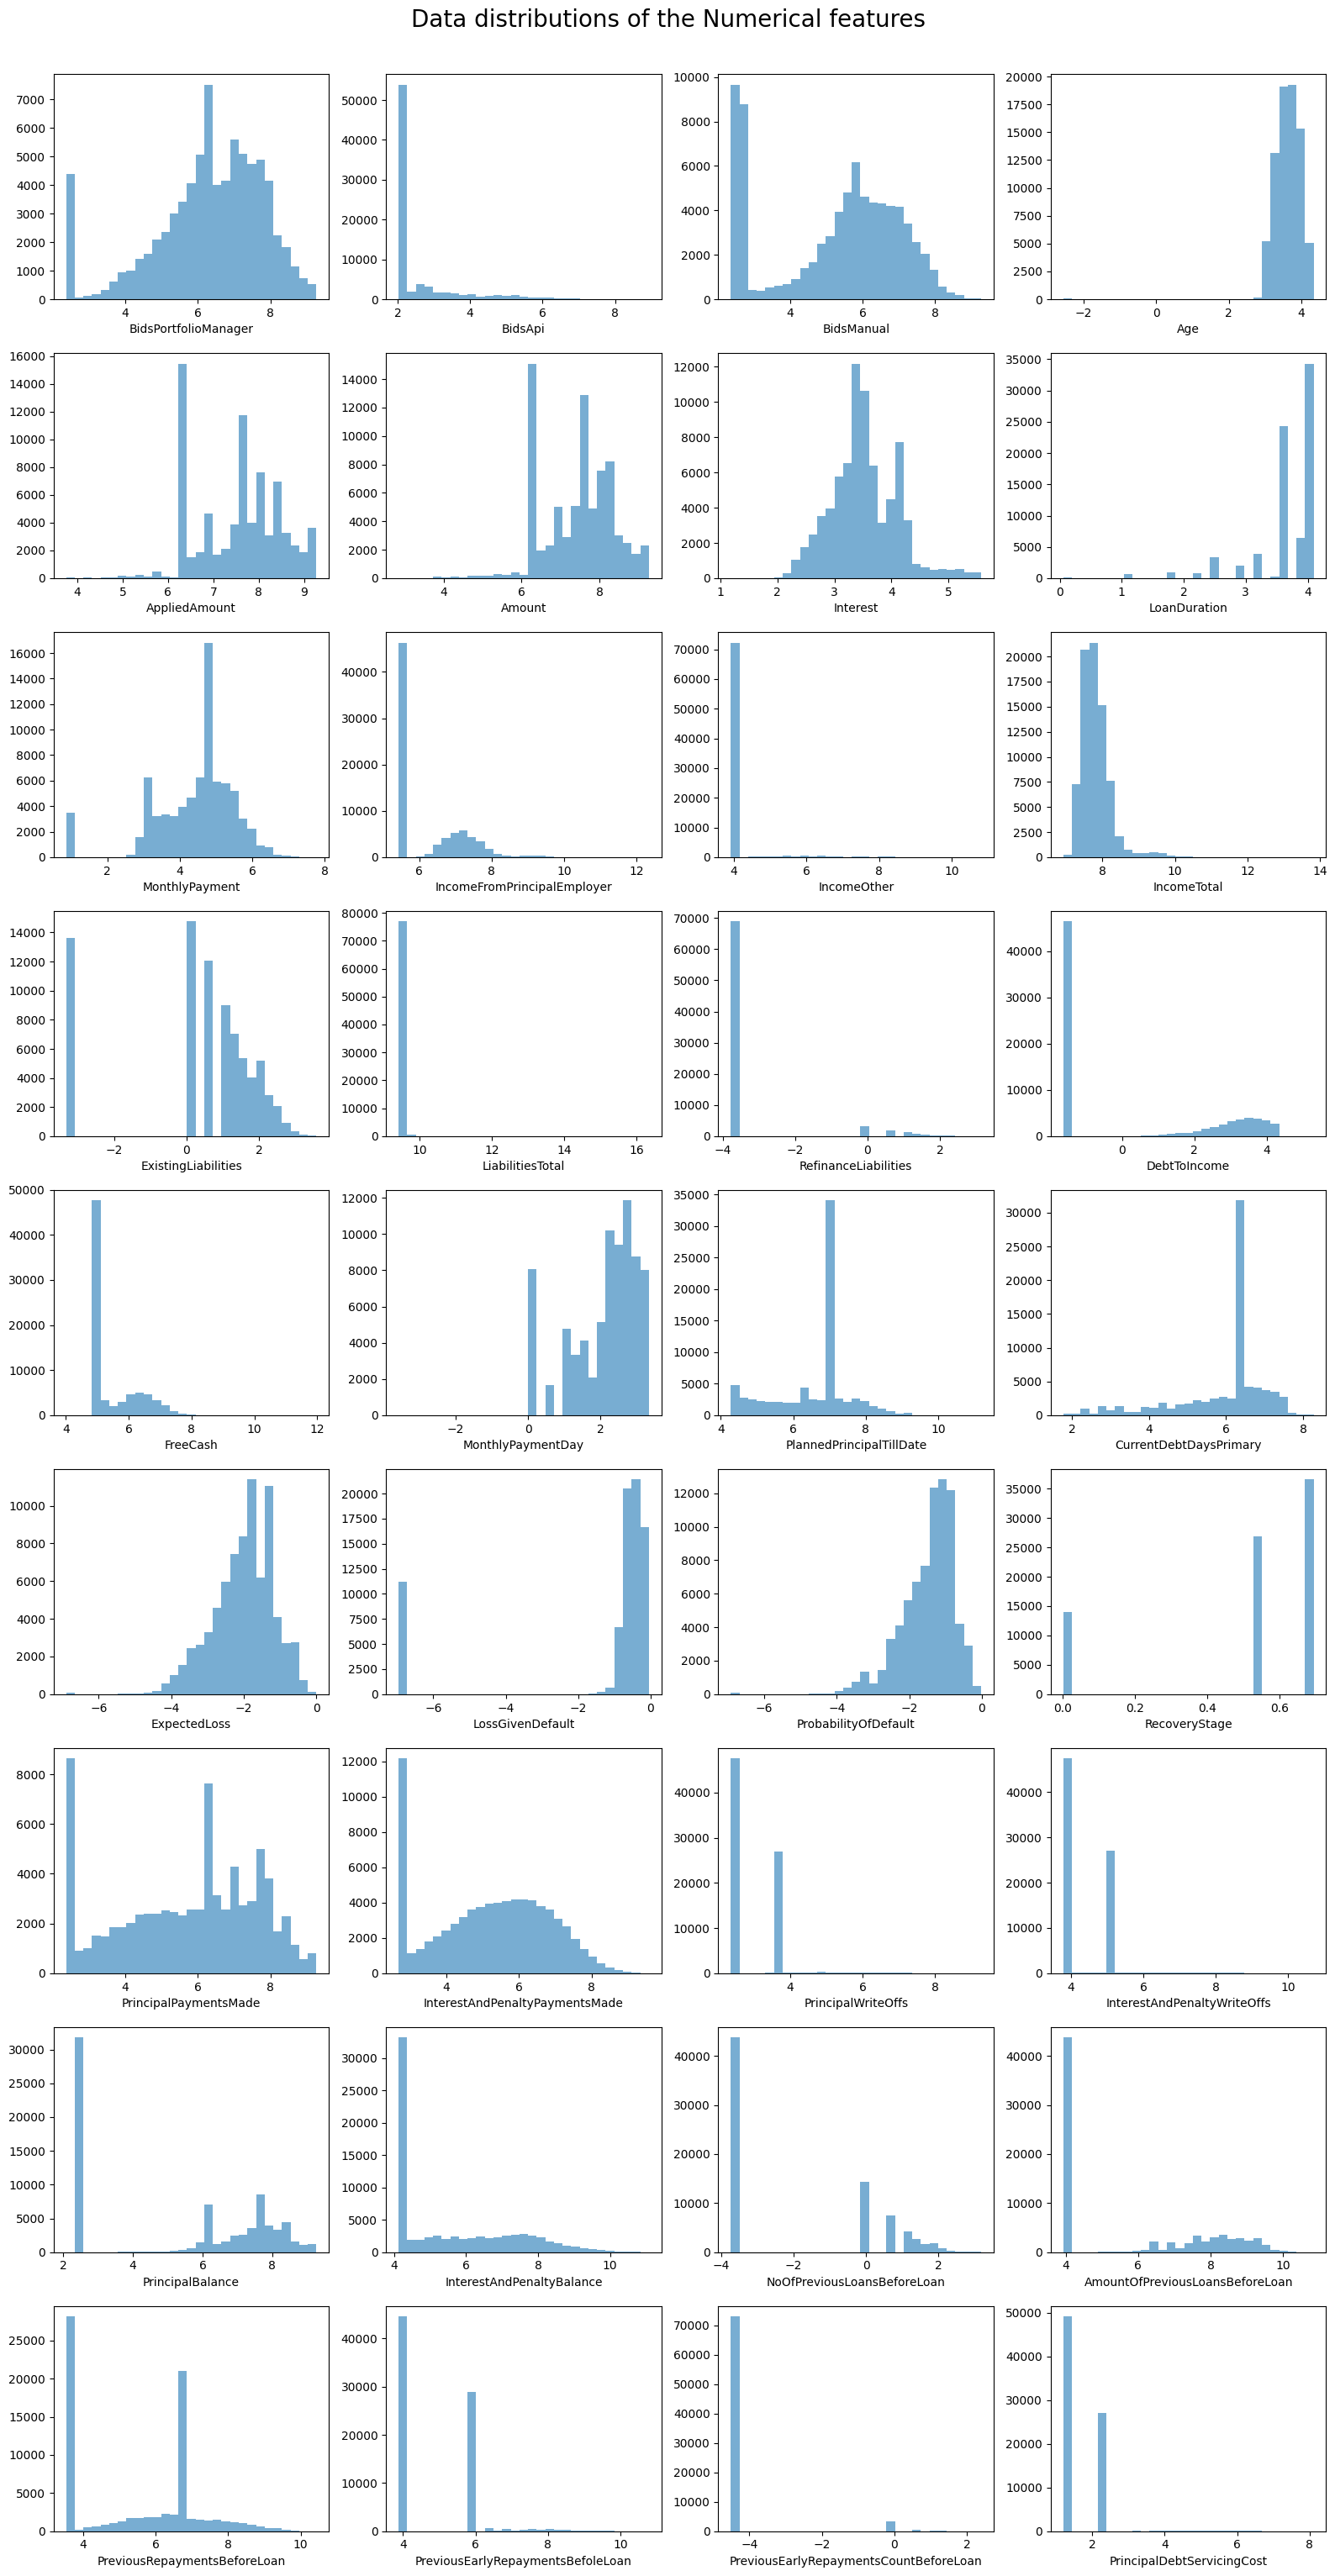

In [ ]:
transformed=numerical.copy()
for i in transformed.columns:
  transformed[i]=np.log(transformed[i]+(transformed[i].max()-transformed[i].min())*0.001)
visualizedist(transformed)
log=['BidsPortfolioManager','ExpectedLoss']

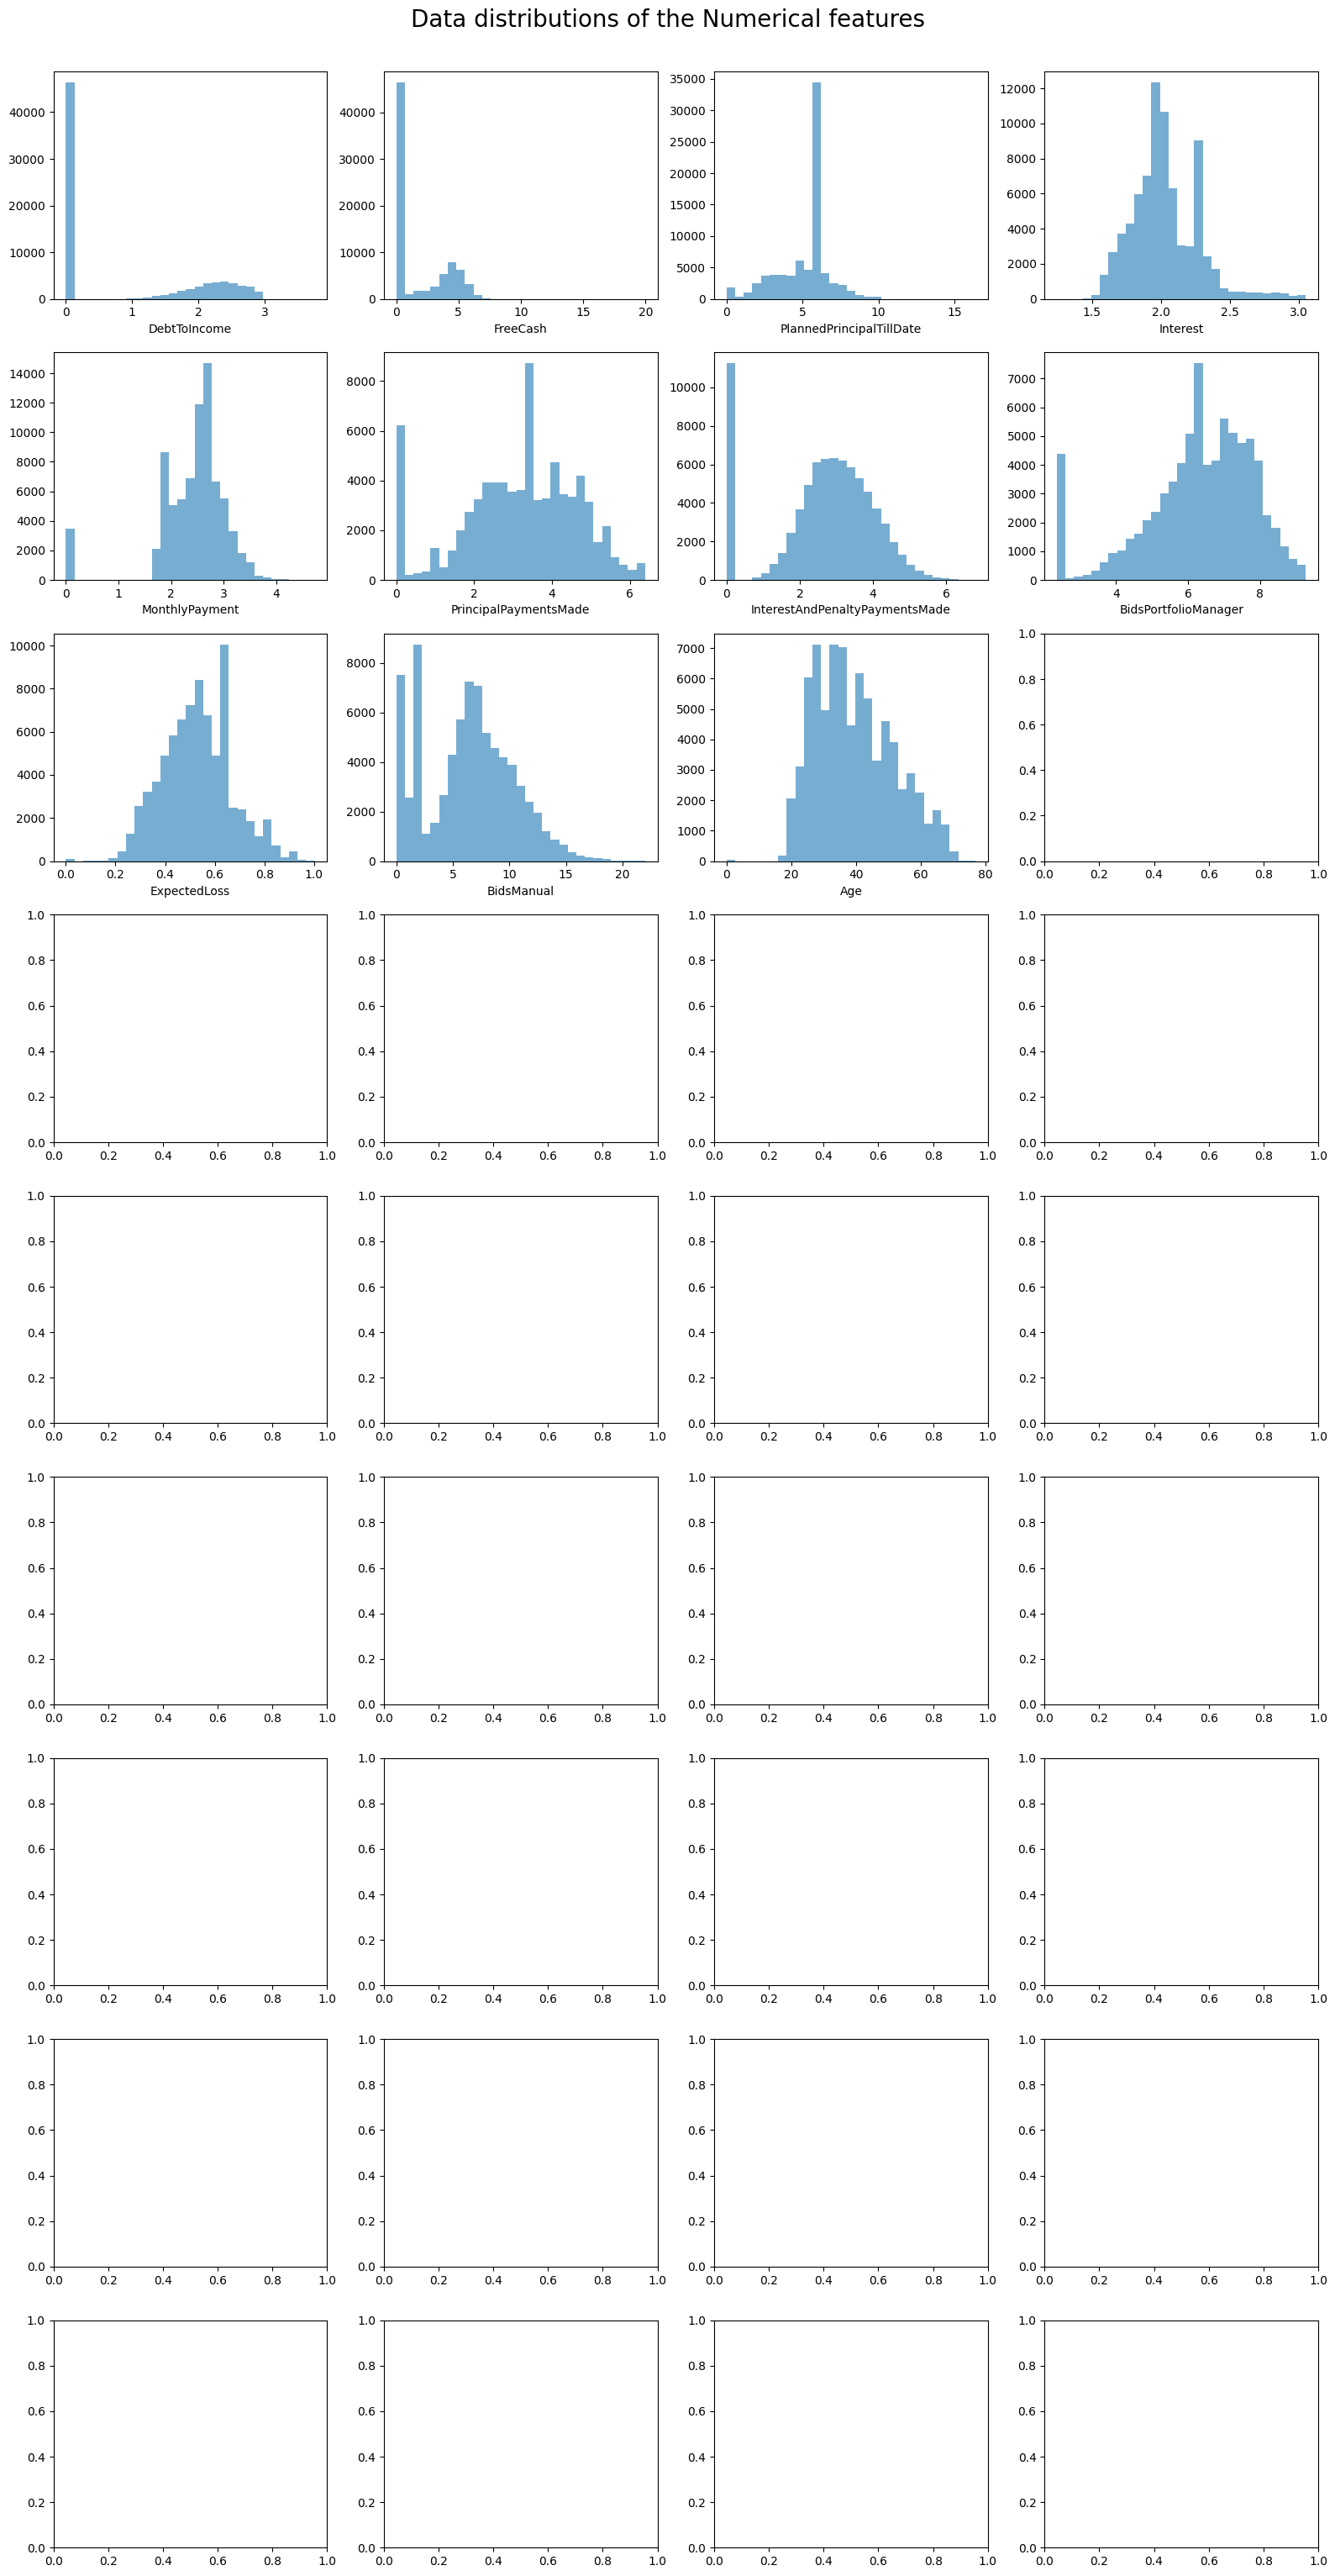

In [ ]:
transformed=pd.DataFrame()
cube_root=['BidsManual','ExpectedLoss']
log=['BidsPortfolioManager','ExpectedLoss']
power_5=['Interest','MonthlyPayment','PrincipalPaymentsMade','InterestAndPenaltyPaymentsMade']
powerlog=['DebtToIncome','FreeCash','PlannedPrincipalTillDate']
for col in powerlog:
  transformed[col]=np.power(numerical[col],1/4)
for col in power_5:
  transformed[col]=np.power(numerical[col],1/5)
for col in log:
  transformed[col]=np.log(numerical[col]+(numerical[col].max()-numerical[col].min())*0.001)
for col in cube_root:
  transformed[col]=np.power(numerical[col],1/3)
transformed['Age']=numerical['Age']
transformed.fillna(0,inplace=True)
visualizedist(transformed)

<ipython-input-89-0765222c8954>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=x, ax=ax_dist)
<ipython-input-89-0765222c8954>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=x, ax=ax_dist)
<ipython-input-89-0765222c8954>:12: UserWarning: 

`distplot` is a deprecated function and will be

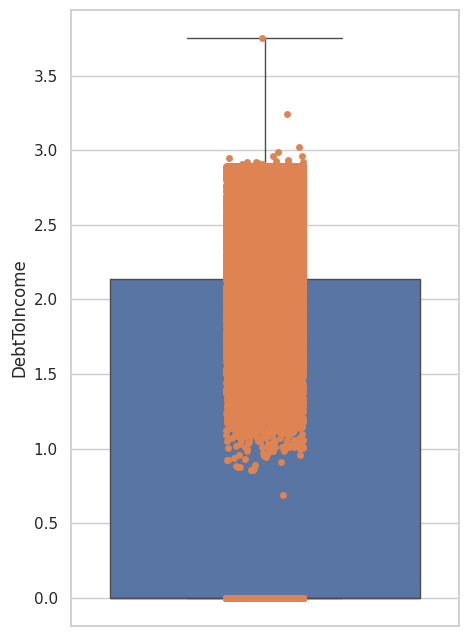

<Figure size 2500x1500 with 0 Axes>

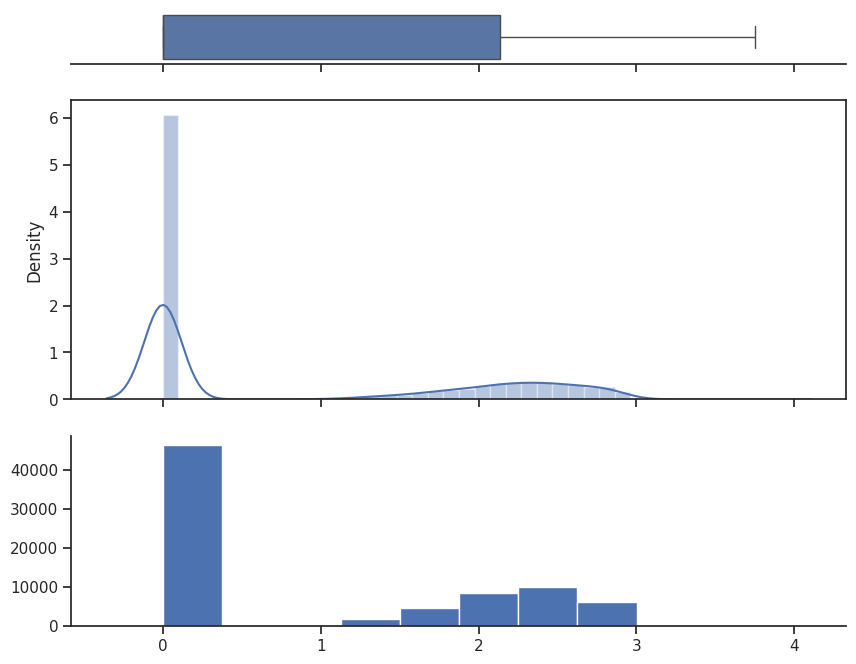

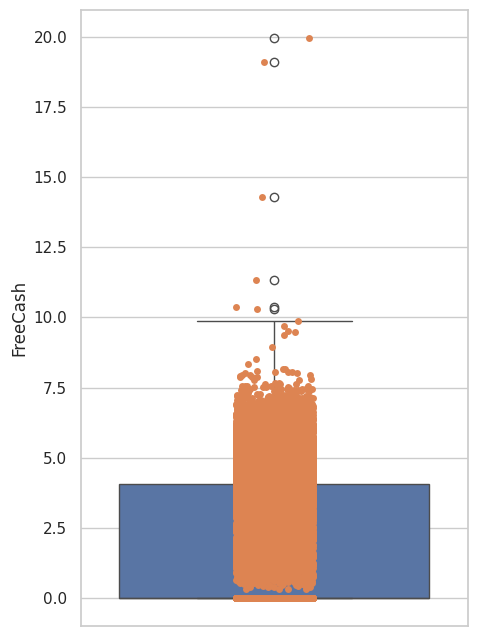

<Figure size 2500x1500 with 0 Axes>

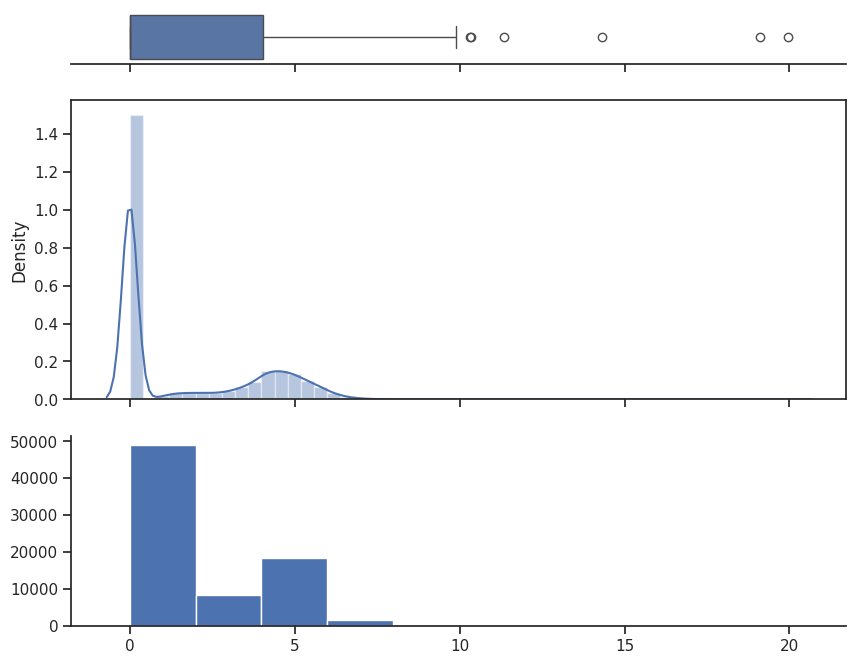

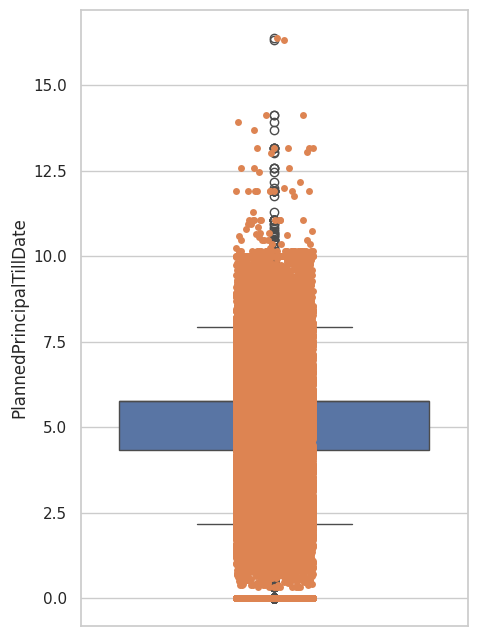

<Figure size 2500x1500 with 0 Axes>

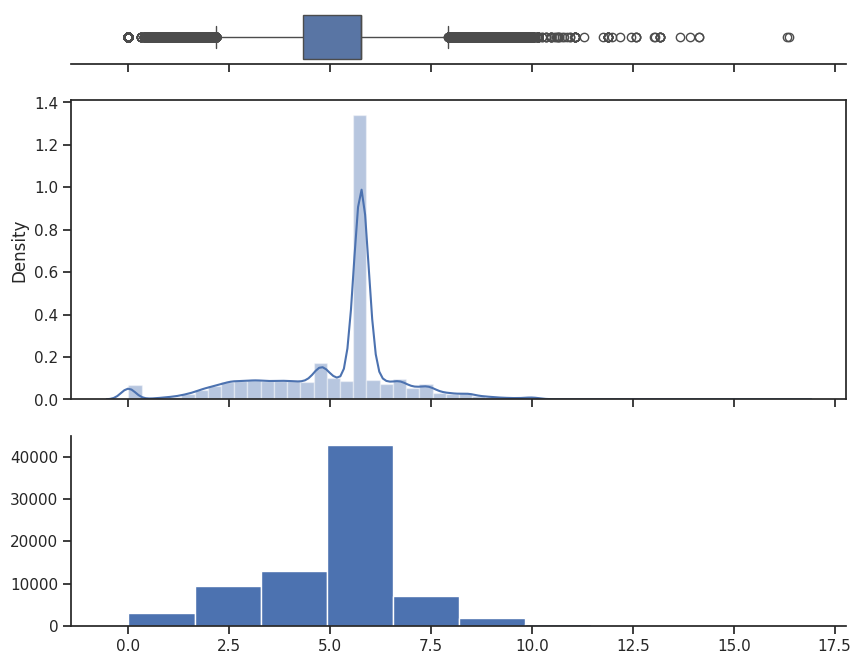

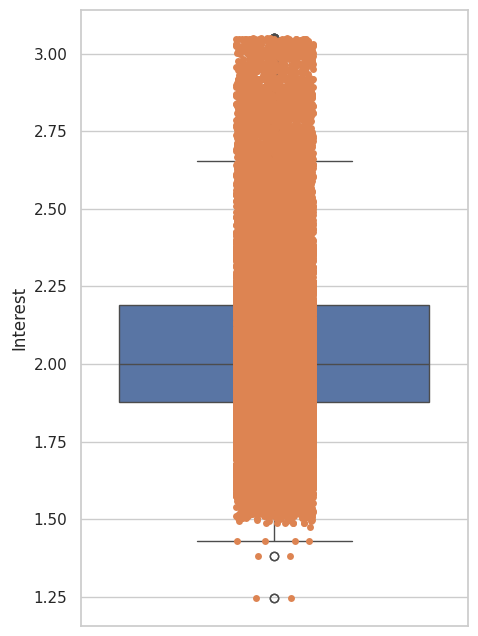

<Figure size 2500x1500 with 0 Axes>

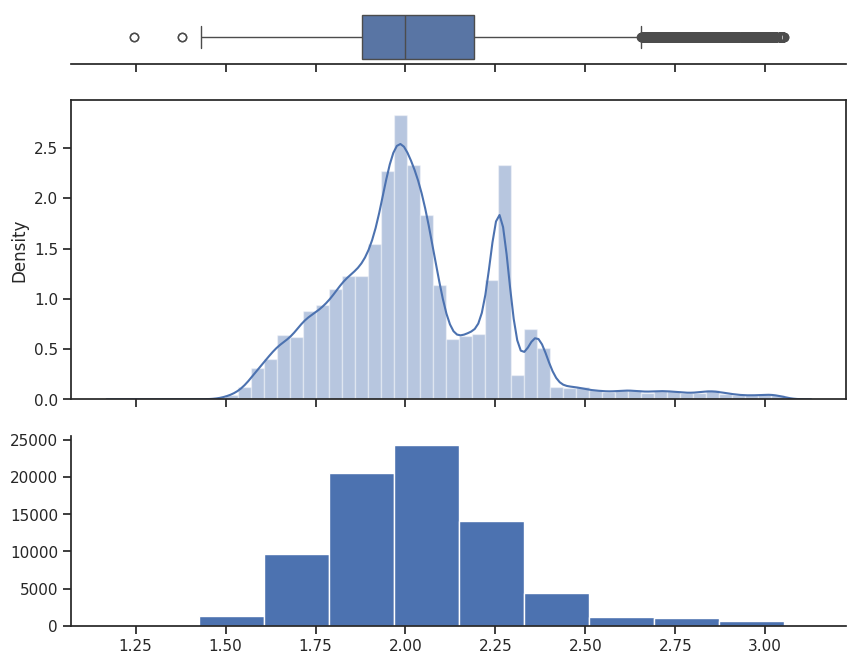

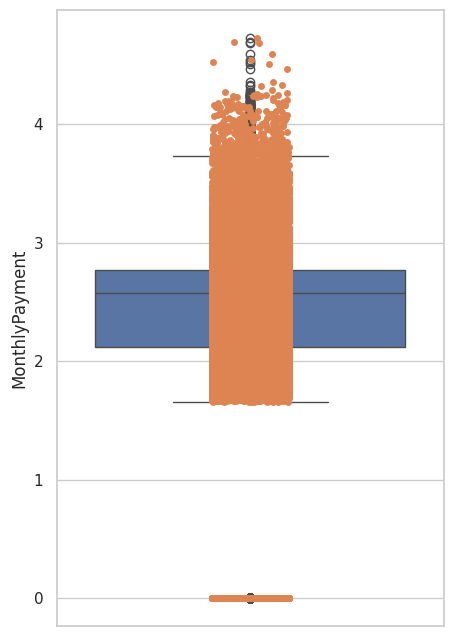

<Figure size 2500x1500 with 0 Axes>

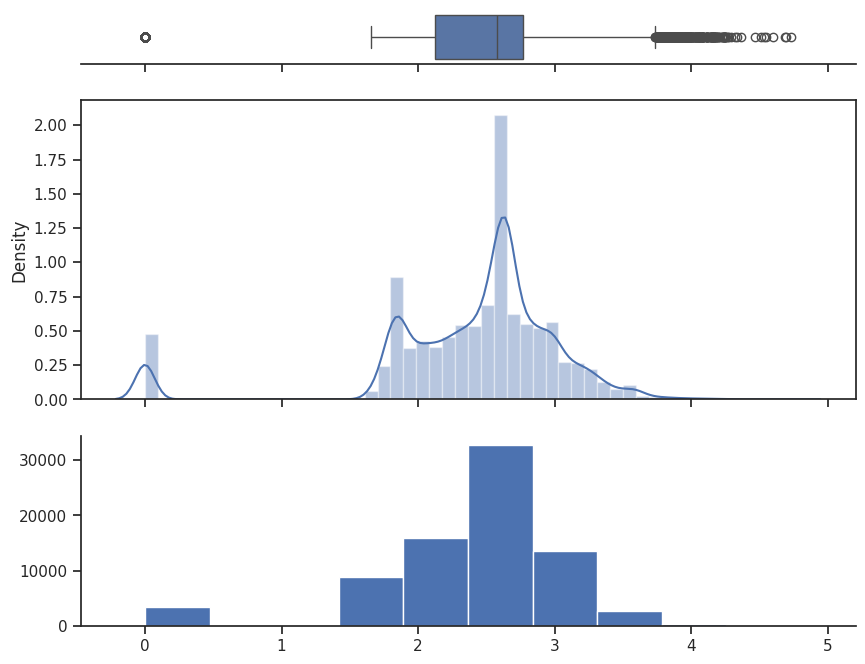

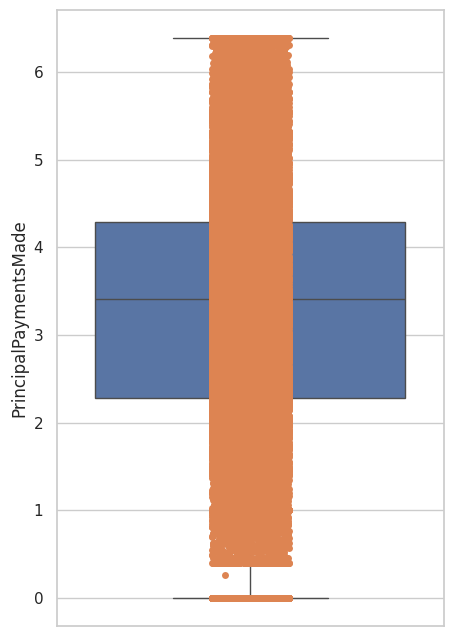

<Figure size 2500x1500 with 0 Axes>

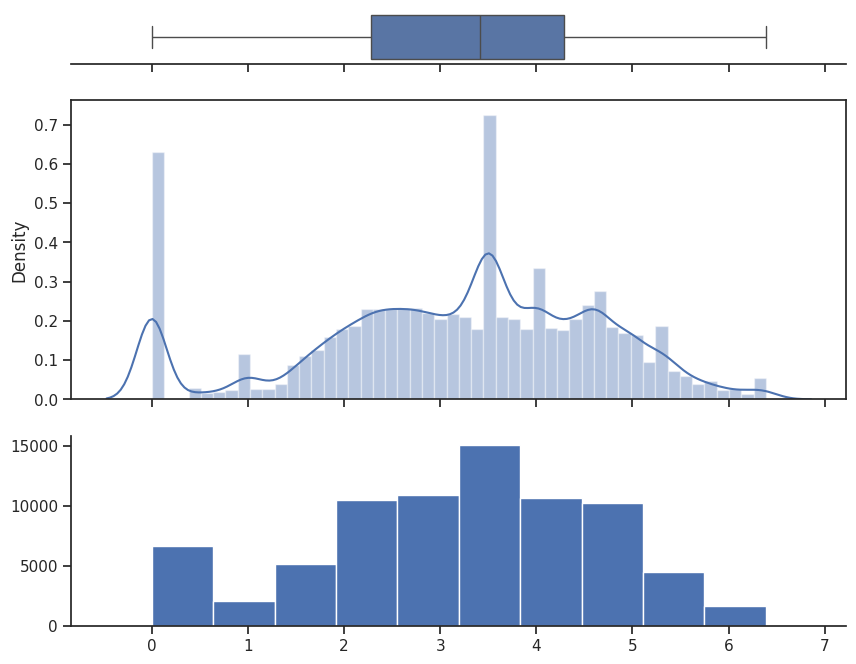

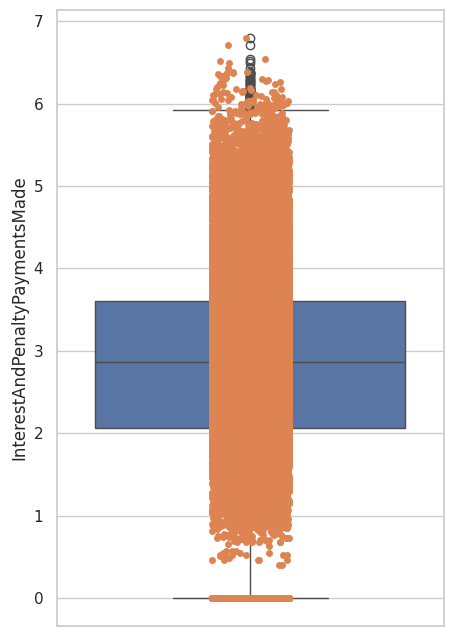

<Figure size 2500x1500 with 0 Axes>

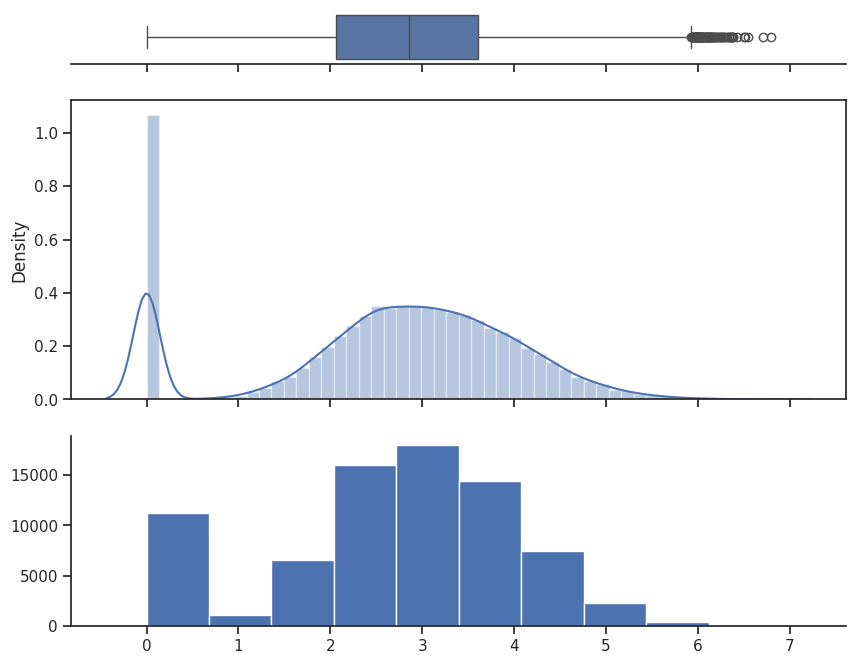

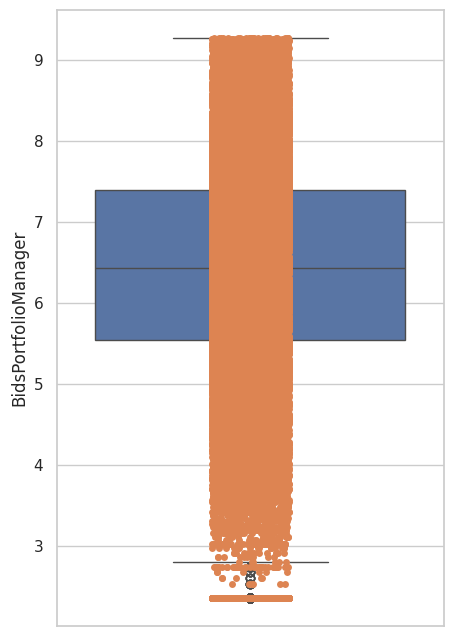

<Figure size 2500x1500 with 0 Axes>

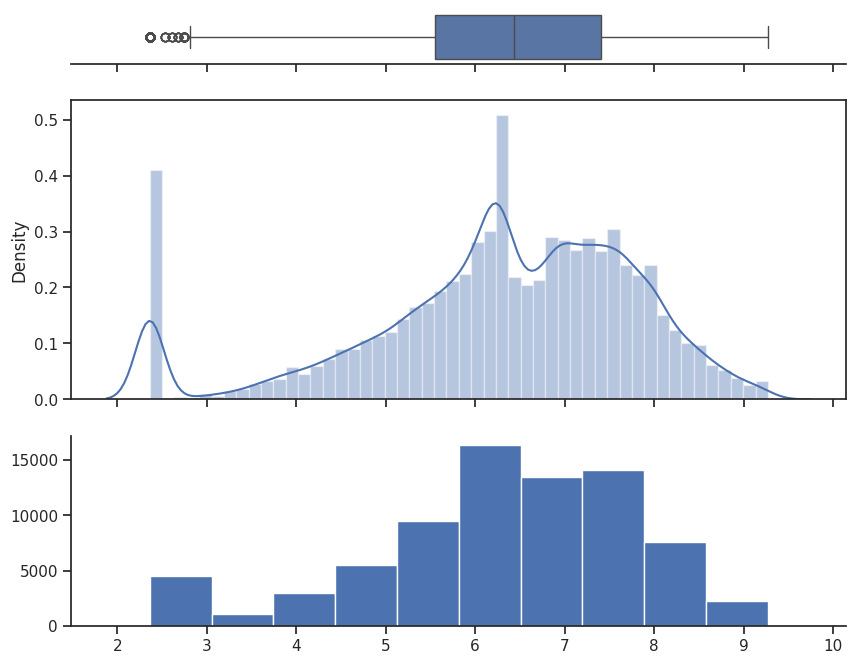

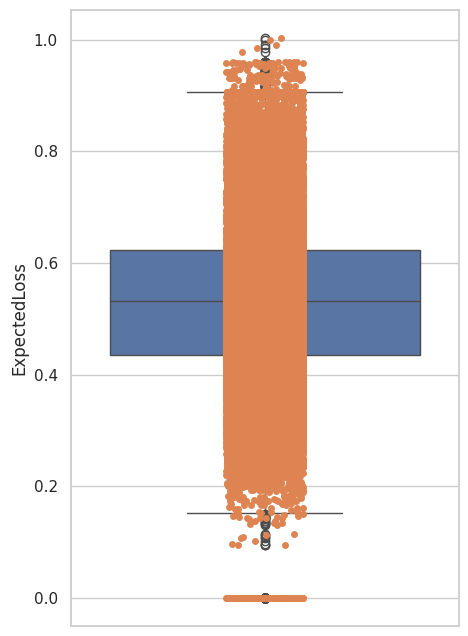

<Figure size 2500x1500 with 0 Axes>

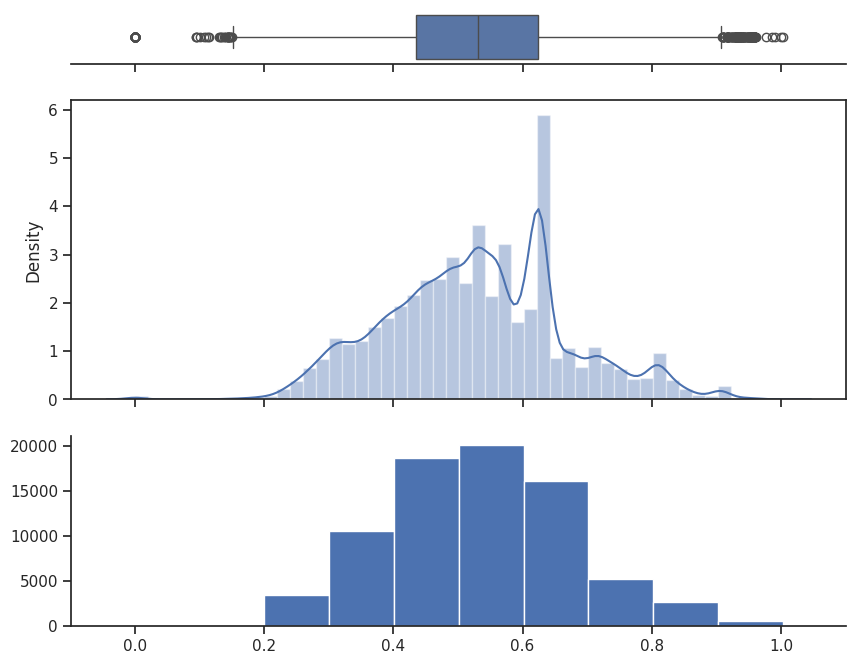

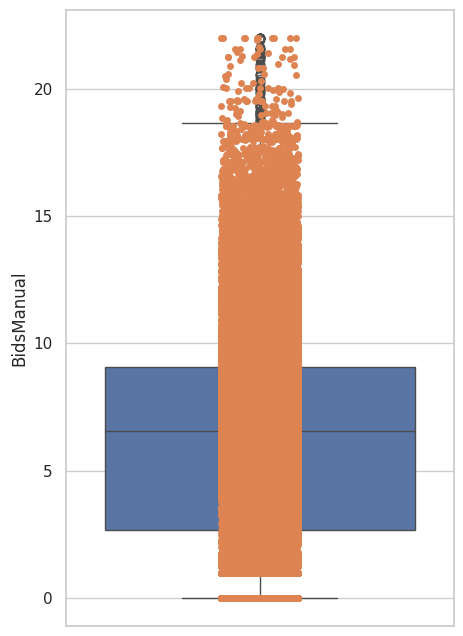

<Figure size 2500x1500 with 0 Axes>

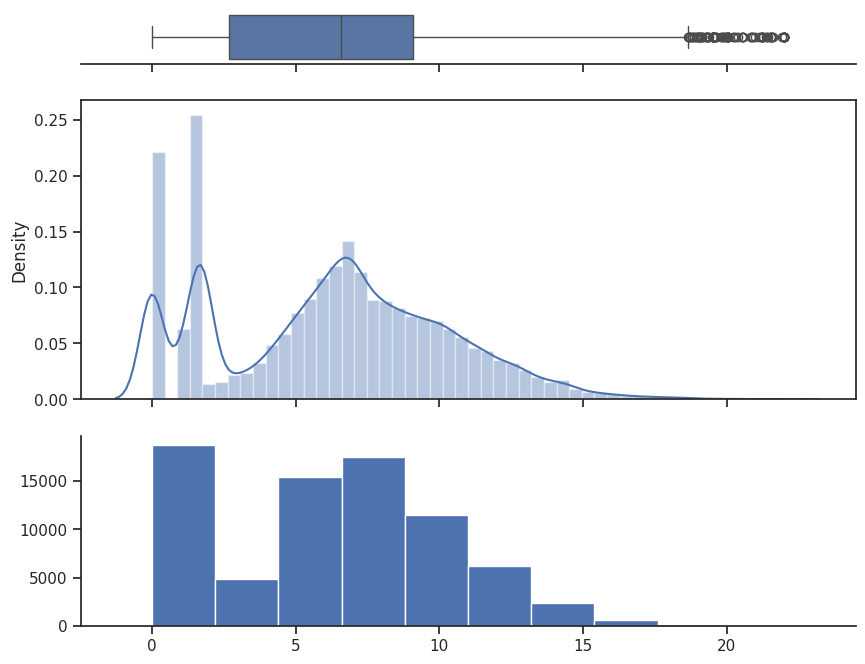

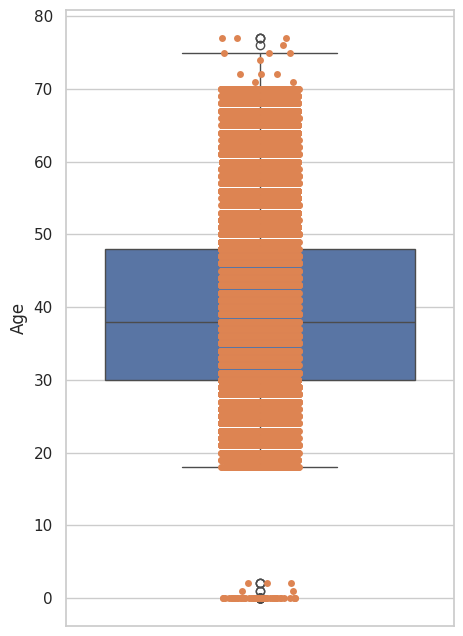

<Figure size 2500x1500 with 0 Axes>

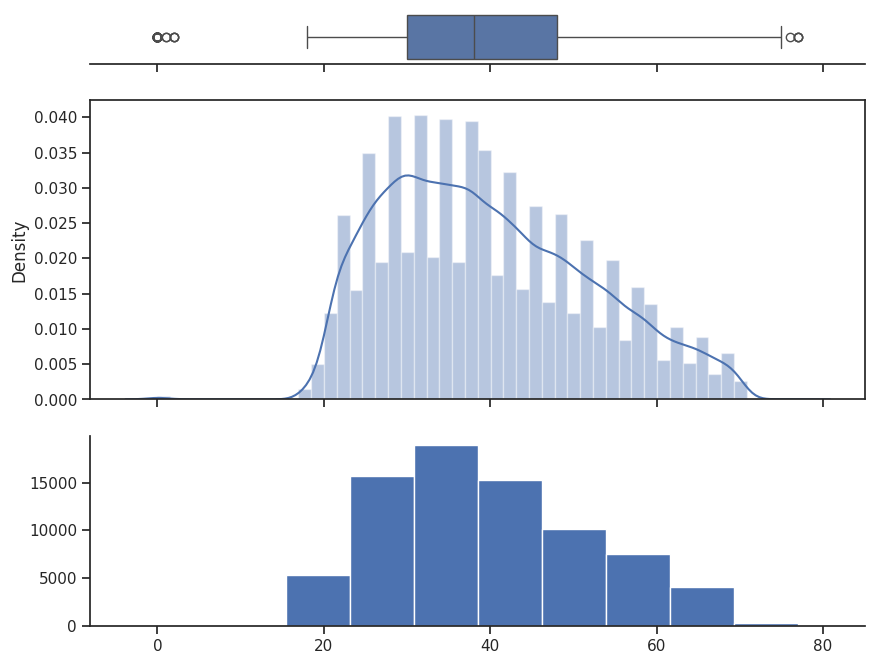

In [ ]:
for col in transformed.columns:
  plt.figure(figsize=(5, 8))
  sns.set(style='whitegrid')
  sns.boxplot( y=transformed[col] )
  sns.stripplot( y=transformed[col] )
  plt.figure(figsize=(25, 15))
  sns.set(style="ticks")
  f, (ax_box, ax_dist, ax_hist) = plt.subplots(3, sharex=True, figsize=(10, 8),
                                    gridspec_kw={"height_ratios": (.1, .55,.35)})
  x=transformed[col]
  sns.boxplot(x=x, ax=ax_box)
  sns.distplot(x=x, ax=ax_dist)
  # sns.histplot(x, ax=ax_hist)
  plt.hist(x)
  ax_box.set(yticks=[])
  sns.despine(ax=ax_hist)
  sns.despine(ax=ax_box, left=True)

In [ ]:
for col in transformed.columns:
  Q1 = transformed[col].quantile(0.25)
  Q3 = transformed[col].quantile(0.75)
  IQR = Q3 - Q1
  outliers_iqr = transformed[(transformed[col] < (Q1 - (1.5 * IQR))) | (transformed[col] > (Q3 + (1.5 * IQR)))][col]
  print(f'Outliers for {col}: {len(outliers_iqr)}, percent: {len(outliers_iqr)*100/len(transformed[col])}')

Outliers for DebtToIncome: 0, percent: 0.0
Outliers for FreeCash: 6, percent: 0.007752538956508256
Outliers for PlannedPrincipalTillDate: 7910, percent: 10.220430524330052
Outliers for Interest: 1917, percent: 2.476936196604388
Outliers for MonthlyPayment: 3840, percent: 4.961624932165284
Outliers for PrincipalPaymentsMade: 0, percent: 0.0
Outliers for InterestAndPenaltyPaymentsMade: 86, percent: 0.111119725043285
Outliers for BidsPortfolioManager: 4432, percent: 5.726542109207432
Outliers for ExpectedLoss: 251, percent: 0.3243145463472621
Outliers for BidsManual: 97, percent: 0.12533271313021682
Outliers for Age: 57, percent: 0.07364912008682843


In [ ]:
for col in transformed.columns:
  Q1 = transformed[col].quantile(0.25)
  Q3 = transformed[col].quantile(0.75)
  IQR = Q3 - Q1
  transformed[col]=np.where(transformed[col] < (Q1 - (1.5 * IQR)),Q1 - 1.5 * IQR,np.where(transformed[col] > (Q3 + (1.5 * IQR)),Q3 + (1.5 * IQR),transformed[col]))